<a href="https://colab.research.google.com/github/menguelx7/Diplodatos/blob/main/Grupo_N%C2%BA1_Ejercicio_1_y_2_Parte_2_AyVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import statsmodels.stats.api as sms
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import kstest


seaborn.set_context('talk')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

**Respuesta:**
En primer lugar, se calcula la media del salario neto para ambos grupos. Así, se obtiene que, para el grupo A, el salario medio es igual a 101.481,62 (considerando los salarios que son mayores a 1000), y para el grupo B, el salario medio es de 78.219,25 (considerando también salarios superiores a 1000).

In [ ]:
A_mean = groupA.mean()
A_mean

101481.62434267918

In [ ]:
B_mean = groupB.mean()
B_mean

78219.25094276095

Una vez obtenidas las medias de los salrios netos para ambos grupos, se puede proceder al cálculo de la estimación puntual de la diferencia de medias. En este caso, el estimador puntual ("diff_mean") de la diferencia de medias entre los grupos A y B resulta igual a 23.262,37.

In [ ]:
#Estimación puntual
diff_mean = A_mean - B_mean
diff_mean

23262.37339991823

Para el cáculo del intervalo de confianza para la diferencia de medias, se utilizará la prueba t o t-test. Previamente se calcula la varianza de cada grupo para verificar si son similares o no. 

In [ ]:
sA = groupA.var()
round(sA,2)

10447968511.73

In [ ]:
sB = groupB.var()
round(sB,2)

3193982222.48

Como se observa en las celdas anteriores, las varianzas del grupo A (sA) y B (sB) parecen ser muy distintas, por lo tanto se considerará que ambos grupos tienen distinta dispersión.

Para el cálculo del intervalo, se toma un nivel de significancia del 5% definido por alfa.  

Luego de aplicar la fórmula, se obtiene un intervalo de (18558,01 - 27966,73) para la diferencia de medias. Esto significa que con un 95% de nivel de confianza se puede afirmar que la diferencia entre las medidas del grupo A y el grupo B se encuentra dentro de los límtes del intervalo. También puede observarse que la estimación puntual calculada previamente se encuentra dentro de los límites del intervalo, algo que resulta lógico. 

In [ ]:
#intervalo de confianza
cm = sms.CompareMeans(sms.DescrStatsW(groupA), sms.DescrStatsW(groupB))
print(cm.tconfint_diff(alpha=0.05, usevar='unequal'))

(18558.016394102247, 27966.730405734153)


Por otro lado, por el Teorema Central del Límite (TCL) se sabe que la distribución de una muestra se aproxima a una normal a medida que el tamaño de la muestra incrementa, sin importar la distribución poblacional. A modo de convención se considera que para muestras mayores de 30, el TCL puede ser utilizado. Luego, tal como se calcula en las dos siguientes celdas, tanto el grupo A como el grupo B tienen tamaños superiores a 30, por lo que se podría considerar que tienen una distribución normal. 

In [ ]:
groupA.count()

4815

In [ ]:
groupB.count()

891

Calculando nuevamente el intervalo con la preba z en vez de t, se obtiene el siguiente intervalo: (18560,66 - 27964,07). Este intervalo es similar al annterior y se puede interpretar, al igual que en el caso anterior, afirmando que la diferencia de medias se ubica dentro de los límites de ese intervalo con un 95% de confianza.

In [ ]:
cm = sms.CompareMeans(sms.DescrStatsW(groupA), sms.DescrStatsW(groupB))
print(cm.zconfint_diff(alpha=0.05, usevar='unequal'))

(18560.667138346118, 27964.079661490283)


Una última conclusión que se puede obtener de ambos intervalos es que, dado que el valor de 0 no está dentro del intervalo (el límite inferior debería ser negativo y el límite superior debería ser positivo), se puede concluir con un 95% de confianza que el salario medio del grupo A es mayor al salario medio del grupo B.

Esto se relaciona con el test de hipótesis, porque dicho test suele utilizarse para afirmar o refutar la igualdad de medias de dos o más muestras. En este caso, la conculsión obtenida a partir del intervalo de confianza nos permitiría rechazar una hipótesis nula de igualdad de medias, si fuera el caso. 

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


**RESPUESTA:**
Para este ejercicio, el test de hipótesis se definiría de la siguiente manera:


*   Ho = Los salarios de los grupos A y B tienen la misma distribución.

*   H1 = Los salarios de los grupos A y B no tienen la misma distribución.


En primer lugar, se realiza el test de Kolmogorov–Smirnov para aceptar o rechazar la hipótesis nula. Este test es más apropiado que el test de Shapiro–Wilk cuando el tamaño de las muestras de cada grupo es mayor o igual a 50, que es el caso de los grupos A y B.

In [ ]:
ks_2samp(groupA, groupB)

Ks_2sampResult(statistic=0.14701532458541805, pvalue=1.534623420196351e-14)

Dado que el p-value es menor que 0.05, hay evidencia suficiente para rechazar la hipótesis nula de que ambas muestras tienen la misma distribución.

Otra forma de comparar distribuciones puede ser de forma gráfica. En los histogramas de abajo se puede observar que ambos grupos presentan una distribución con un sesgo a la izquierda, aunque eso no significa que presenten las mismas métricas.

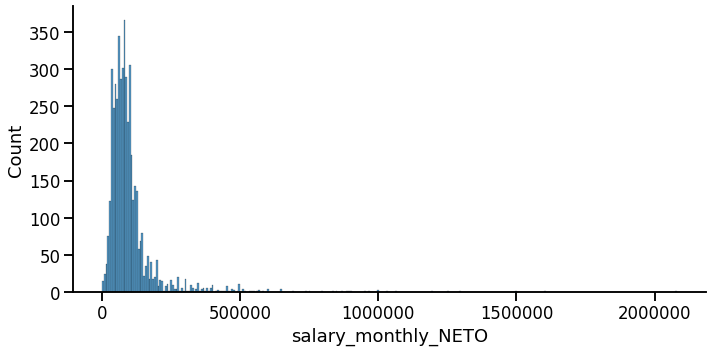

In [ ]:
seaborn.displot(groupA, aspect=2) 
plt.ticklabel_format(style='plain', axis='x')

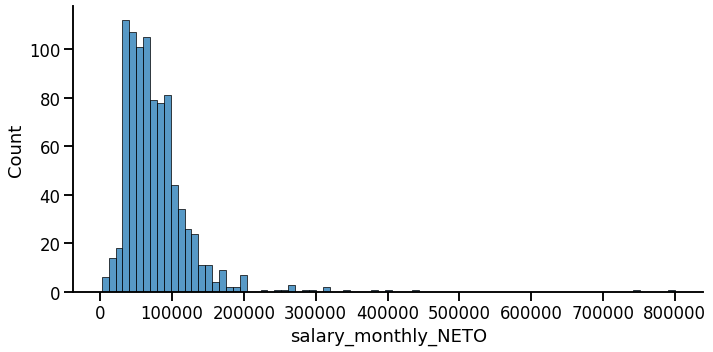

In [ ]:
seaborn.displot(groupB, aspect=2) 
plt.ticklabel_format(style='plain', axis='x')

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

Luego, se podría hacer una comparación de las medias de cada grupo, considerando el siguiente test de hipótesis:


*   Ho: La media de salarios del grupo A es igual a la media de salarios del grupo B
*   H1: La media de salarios del grupo A es distinta a la media de salarios del grupo B




El estadístico pivot es aquel que tiene distribución conocida y que no depende de nungún parámetro.

Para contrastar la hipótesis nula se podría usar el test T-Student que, como se observa en la celda siguiente, rechazaría la hipótesis nula de igualdad de medias a un nivel del 5% de significancia. 

In [ ]:
stats.ttest_ind(groupA, groupB)

Ttest_indResult(statistic=6.608570598021937, pvalue=4.232993821653396e-11)

No obstante, dicho test asume que las varianzas de ambos grupos son iguales y  ya se observó anteriormente que no es así. Entonces, se realiza el mismo test considerando la diferencia de varianzas (test de Welch)

In [ ]:
stats.ttest_ind(groupA, groupB, equal_var = False)

Ttest_indResult(statistic=9.697205976350673, pvalue=8.605197322133209e-22)

El resultado es el mismo, rechazar la hipótesis nula de igualdad de medias. Es necesario aclarar que ambos toman como supuesto la normalidad de las distribuciones.

Si bien ya fue mencionado anteriormente que, por el Teorema Central del Límite, puede suponerse que ambos grupos se distribuyen de manera normal, se procederá a transformar ambas distribuciones en normales (aplicando logaritmos) para observar si se modifican los resultados. 

In [ ]:
log_A = np.log(groupA)

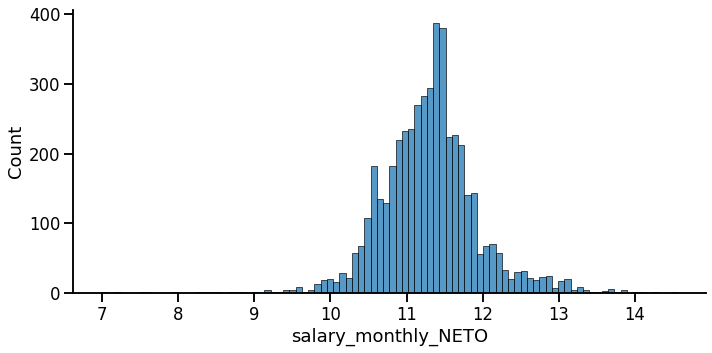

In [ ]:
seaborn.displot(log_A, aspect=2) 
plt.ticklabel_format(style='plain', axis='x')

Mediante la transformación de logaritmos, se observa ahora que el salario neto del grupo A tiene una distribución que se aproxima más a una normal

A su vez, se puede comparar el sesgo y la kurtosis de la distribución original (Grupo A) y de la logarítmica (log_A). Por convención, se asume que si el valor del desvío ("skew") está entre -0.5 y 0.5, la distribución puede considerarse simétrica.

In [ ]:
groupA.agg(['skew', 'kurtosis']).transpose()

skew         6.612768
kurtosis    72.859772
Name: salary_monthly_NETO, dtype: float64

In [ ]:
log_A.agg(['skew', 'kurtosis']).transpose()

skew        0.114629
kurtosis    3.406477
Name: salary_monthly_NETO, dtype: float64

Se reaiza el mismo procedimiento para el grupo B y se obtienen resultados similares. 

In [ ]:
log_B = np.log(groupB)

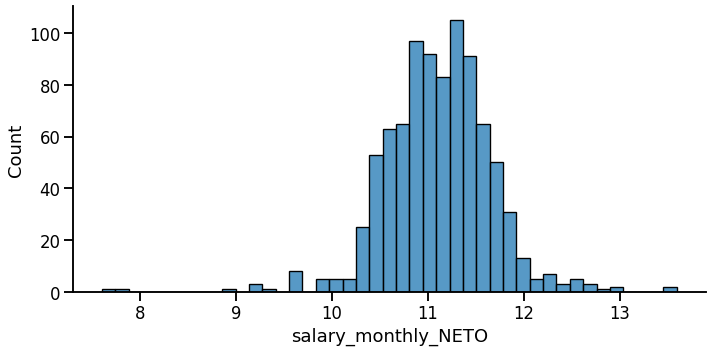

In [ ]:
seaborn.displot(log_B, aspect=2) 
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
log_B.agg(['skew', 'kurtosis']).transpose()

skew       -0.380784
kurtosis    4.133614
Name: salary_monthly_NETO, dtype: float64

Cuando se aplica el test de Welch para las distribuciones logarítmicas, se obtiene un valor p menor que 0.05, porque lo que se puede rechazar nuevamente la hipótesis nula de igualdad de medias. 

In [ ]:
stats.ttest_ind(log_A, log_B, equal_var = False)

Ttest_indResult(statistic=8.990831000550264, pvalue=8.020272743803588e-19)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

NameError: ignored

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


In [ ]:
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

In [ ]:
df['work_province'].value_counts()

Ciudad Autónoma de Buenos Aires    3764
GBA                                 524
Provincia de Buenos Aires           497
Córdoba                             456
Santa Fe                            354
Mendoza                             107
Entre Ríos                           66
Río Negro                            38
Jujuy                                36
Neuquén                              36
Tucumán                              33
Misiones                             26
Chaco                                24
Chubut                               23
Corrientes                           19
La Rioja                             14
Salta                                14
San Luis                             14
Tierra del Fuego                     11
Santiago del Estero                  10
La Pampa                              9
San Juan                              7
Santa Cruz                            6
Formosa                               4
Catamarca                             3
